In [6]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
df = pd.read_csv('Flight Distance Test.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Normalised City Pair  3000 non-null   object 
 1   Departure Code        3000 non-null   object 
 2   Arrival Code          3000 non-null   object 
 3   Departure_lat         3000 non-null   float64
 4   Departure_lon         3000 non-null   float64
 5   Arrival_lat           3000 non-null   float64
 6   Arrival_lon           3000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 164.2+ KB


Data seems to be organised and cleaned (no nulls, redundant features, unusably typed features etc.) and in sufficient amount for analysis. 

In [5]:
df.head()

,Normalised City Pair,Departure Code,Arrival Code,Departure_lat,Departure_lon,Arrival_lat,Arrival_lon
0,"London, United Kingdom - New York, United Stat...",LHR,JFK,51.5,-0.45,40.64,-73.79
1,"Johannesburg, South Africa - London, United Ki...",JNB,LHR,-26.1,28.23,51.47,-0.45
2,"London, United Kingdom - New York, United Stat...",LHR,JFK,51.5,-0.45,40.64,-73.79
3,"Johannesburg, South Africa - London, United Ki...",JNB,LHR,-26.1,28.23,51.47,-0.45
4,"London, United Kingdom - Singapore, Singapore",SIN,LHR,1.3,103.98,51.47,-0.45


In [7]:
df['Normalised City Pair'].nunique()

1602

In [8]:
df['Departure Code'].nunique()

301

In [167]:
df['Arrival Code'].nunique()

341

In [166]:
df['Normalised City Pair'].value_counts()
#Most frequent travel route

London, United Kingdom - New York, United States Of America                      24
Hong Kong, Hong Kong - Singapore, Singapore                                      17
Hong Kong, Hong Kong - Tokyo, Japan                                              16
Edinburgh, United Kingdom - London, United Kingdom                               15
Boston, United States Of America - New York, United States Of America            15
                                                                                 ..
San Jose, United States Of America - Santa Ana, United States Of America          1
Detroit, United States Of America - Philadelphia, United States Of America        1
Atlanta, United States Of America - Charlotte, United States Of America           1
Newark, United States Of America - Oslo, Norway                                   1
Chicago, United States Of America - West Palm Beach, United States Of America     1
Name: Normalised City Pair, Length: 1602, dtype: int64

In [164]:
df['Departure Code'].value_counts()
#Most frequent airports traveled from.

LHR    238
SIN    121
JFK    114
DXB     99
HKG     98
      ... 
BHM      1
ORK      1
BGO      1
YWG      1
GOA      1
Name: Departure Code, Length: 301, dtype: int64

In [165]:
df['Arrival Code'].value_counts()
#Most frequent destinations

LHR    199
JFK    130
SIN    100
DXB     80
HKG     78
      ... 
BLQ      1
MIL      1
CID      1
LJU      1
ANR      1
Name: Arrival Code, Length: 341, dtype: int64

I will now analyse the dataset looking for any discrepancies within it. Knowing that there are some problems with it, at first glance I'd guess that there might either be a problem with same entries being repeated or some kind of mismatch between airports and their geolocation. I will, however approach the dataset as if it was bigger and less structured, meticulously testing each possibility for errors.

Possible data error sources:
1. Nulls
2. Does dep_code == arr_code anywhere?
3. Does dep_code and arr_code always correspond to the same part of norm_city_pair?
4. Does certain lat,lon always correspond to the same departure airport?
5. Does certain lat,lon always correspond to the same arrival airport?

In [14]:
df.isnull().sum()

Normalised City Pair    0
Departure Code          0
Arrival Code            0
Departure_lat           0
Departure_lon           0
Arrival_lat             0
Arrival_lon             0
dtype: int64

No null values

In [11]:
(df['Departure Code'] == df['Arrival Code']).sum()

3

There seem to be some flights that start and end at the same location

In [12]:
df[df['Departure Code'] == df['Arrival Code']]

,Normalised City Pair,Departure Code,Arrival Code,Departure_lat,Departure_lon,Arrival_lat,Arrival_lon
448,"Madrid, Spain - Madrid, Spain",MAD,MAD,51.5,-0.45,40.46,-3.58
1769,"Sao Paulo, Brazil - Sao Paulo, Brazil",CGH,CGH,-22.9,-43.17,-23.63,-46.66
1978,"Dubai, United Arab Emirates - Dubai, United Ar...",DXB,DXB,23.6,58.29,25.25,55.35


Those 3 enries seem to either be a data error, departure problems (maybe the plane was called back to land), or there are multiple airports with the same code.

In [25]:
df.groupby('Departure Code')['Normalised City Pair'].count()

Departure Code
ABQ     2
ABZ     2
ACC    11
ACK     1
AGP     1
       ..
YWG     1
YYC    12
YYZ    28
ZAG     1
ZRH    43
Name: Normalised City Pair, Length: 301, dtype: int64

In [26]:
df.groupby('Departure Code')['Normalised City Pair'].nunique()

Departure Code
ABQ     2
ABZ     1
ACC     9
ACK     1
AGP     1
       ..
YWG     1
YYC    10
YYZ    22
ZAG     1
ZRH    23
Name: Normalised City Pair, Length: 301, dtype: int64

In [18]:
df['Departure Code'].nunique()

301

In [27]:
#Im looking for a way to find if norm_city_pair correctly corresponds with dep and arr codes

In [74]:
df['Normalised City Pair'][df['Departure Code'] == 'ACC'].apply(lambda x: x.split('-'))

145          [Accra, Ghana ,  Johannesburg, South Africa]
489                      [Accra, Ghana ,  Nairobi, Kenya]
876                      [Accra, Ghana ,  Nairobi, Kenya]
890                      [Accra, Ghana ,  Nairobi, Kenya]
1318             [Accra, Ghana ,  London, United Kingdom]
1332    [Accra, Ghana ,  Dar Es Salaam, United Rep. Of...
1885            [Accra, Ghana ,  Entebbe/kampala, Uganda]
2307    [Accra, Ghana ,  New York, United States Of Am...
2701               [Accra, Ghana ,  Mauritius, Mauritius]
2768                     [Accra, Ghana ,  Lusaka, Zambia]
2954                 [Accra, Ghana ,  Gaborone, Botswana]
Name: Normalised City Pair, dtype: object

In [38]:
df.groupby('Departure Code')['Normalised City Pair'].describe()

,count,unique,top,freq
Departure Code,,,,
ABQ,2,2,"Albuquerque, United States Of America - San Fr...",1
ABZ,2,1,"Aberdeen, United Kingdom - London, United Kingdom",2
ACC,11,9,"Accra, Ghana - Nairobi, Kenya",3
ACK,1,1,"Nantucket, United States Of America - New York...",1
AGP,1,1,"London, United Kingdom - Malaga, Spain",1
...,...,...,...,...
YWG,1,1,"Vancouver, Canada - Winnipeg, Canada",1
YYC,12,10,"Calgary, Canada - Vancouver, Canada",2
YYZ,28,22,"New York, United States Of America - Toronto, ...",4


In [42]:
for dep in df['Departure Code'].unique():
    if df['Normalised City Pair'][df['Departure Code'] == dep].apply(lambda x: x.split('-')[0]).nunique():
        print(dep)

Each dep_code corresponds to exactly one departure part of norm_name

In [43]:
for arr in df['Arrival Code'].unique():
    if not df['Normalised City Pair'][df['Arrival Code'] == arr].apply(lambda x: x.split('-')[1]).nunique():
        print(arr)

Each arr_code corresponds to exactly one arrival part of norm_name

In [51]:
df.groupby('Departure Code')['Departure_lat'].nunique()

Departure Code
ABQ    2
ABZ    1
ACC    4
ACK    1
AGP    1
      ..
YWG    1
YYC    3
YYZ    3
ZAG    1
ZRH    3
Name: Departure_lat, Length: 301, dtype: int64

In [52]:
df.groupby('Departure Code')['Departure_lon'].nunique()

Departure Code
ABQ    2
ABZ    1
ACC    4
ACK    1
AGP    1
      ..
YWG    1
YYC    3
YYZ    3
ZAG    1
ZRH    3
Name: Departure_lon, Length: 301, dtype: int64

...thats a pretty big error. A single departure code apparently can have multiple geographical locations.

In [84]:
df.groupby('Departure Code').std()[['Departure_lat', 'Departure_lon']]

,Departure_lat,Departure_lon
Departure Code,,
ABQ,3.323402,1.251579
ABZ,0.000000,0.000000
ACC,13.752243,37.670419
ACK,NaN,NaN
AGP,NaN,NaN
...,...,...
YWG,NaN,NaN
YYC,2.159317,11.406084
YYZ,2.217392,18.437658


<AxesSubplot:ylabel='Departure Code'>

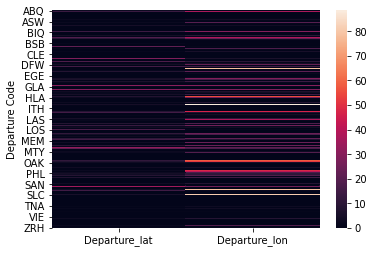

In [87]:
sns.heatmap(df.groupby('Departure Code').std()[['Departure_lat', 'Departure_lon']].fillna(value=0))

There is a lot of variance as to the geolocation of same departure airports.

In [57]:
df[df['Departure Code'] == 'ABQ']

,Normalised City Pair,Departure Code,Arrival Code,Departure_lat,Departure_lon,Arrival_lat,Arrival_lon
1606,"Albuquerque, United States Of America - San Fr...",ABQ,SFO,39.8,-104.86,37.61,-122.39
2490,"Albuquerque, United States Of America - Denver...",ABQ,DEN,35.1,-106.63,39.77,-104.86


In [58]:
df[df['Departure Code'] == 'ABZ']

,Normalised City Pair,Departure Code,Arrival Code,Departure_lat,Departure_lon,Arrival_lat,Arrival_lon
1778,"Aberdeen, United Kingdom - London, United Kingdom",ABZ,LCY,57.2,-2.2,51.50,0.05
2078,"Aberdeen, United Kingdom - London, United Kingdom",ABZ,LGW,57.2,-2.2,51.16,-0.16


If every dep_code had one possible set of coordinates then their std would be 0 or null for single entries. It is not the case. A clustermap can help visualise how much of the dataset is corrupted in that way.

In [115]:
by_dep = df.groupby('Departure Code').std()[['Departure_lat', 'Departure_lon']].fillna(value=0)
incorrect_codes = by_dep[(by_dep['Departure_lat'] != 0) | (by_dep['Departure_lon'] != 0)]
100*incorrect_codes.shape[0]/by_dep.shape[0]

39.8671096345515

It seems that around 40% of Departure codes are wrong. It can be further visualised by a clusterma below.

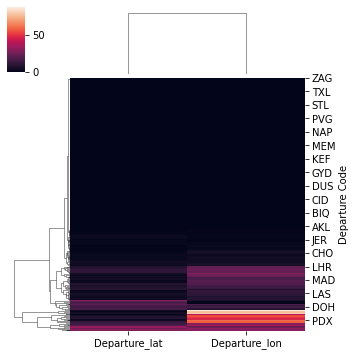

In [92]:
sns.clustermap(df.groupby('Departure Code').std()[['Departure_lat', 'Departure_lon']].fillna(value=0), figsize=(5,5))

In [120]:
no_incorrect_entries = df[df['Departure Code'].isin(incorrect_codes.index.tolist())].shape[0]
100*no_incorrect_entries/df.shape[0]

85.8

Unfortunately it seems that over 85% of the dataset contains those incorrect departurecode locations.

In [82]:
df.groupby('Arrival Code').std()[['Arrival_lat', 'Arrival_lon']]

,Arrival_lat,Arrival_lon
Arrival Code,,
ABQ,0.0,0.0
ABV,0.0,0.0
ABZ,0.0,0.0
ACC,0.0,0.0
ADD,0.0,0.0
...,...,...
YYC,0.0,0.0
YYJ,NaN,NaN
YYZ,0.0,0.0


<AxesSubplot:ylabel='Arrival Code'>

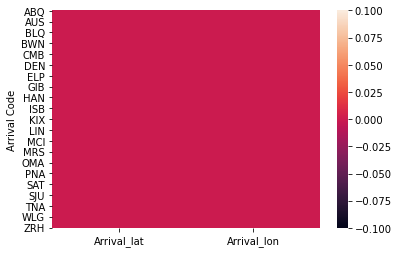

In [81]:
sns.heatmap(df.groupby('Arrival Code').std()[['Arrival_lat', 'Arrival_lon']].fillna(value=0))

In [71]:
df.groupby('Arrival Code')['Arrival_lat'].nunique().size

341

In [72]:
df.groupby('Arrival Code')['Arrival_lon'].nunique().size

341

In [67]:
df['Arrival Code'].nunique()

341

Each arrival code on the other hand does seem to correspond to single coordinate.

Summing up two problems are:
1. 3 entries with flights starting and ending at the same airport however at different location,
2. Over 85% of dataset consists of Departure codes which have inconsistent coordinates. Some of them might be correct but there is no way of telling that just from the dataset.

Taking that information under consideration, calculating end-to-end distances won't result in realistic data. For the sake of the excercise I will do that anyway.

Methods for calculating geo dist:
1. Haversine formula  (great-circle dist, earth as a perfect sphere)
2. geodesic dist, ellipsoidal earth

In [122]:
import math

In [137]:
def haversine(coord1, coord2):
    R = 6371  # Earth radius in km
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(dlambda/2)**2
    
    return 2 * R * math.atan2(math.sqrt(a), math.sqrt(1 - a))

In [131]:
from geopy import distance

In [151]:
coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

round(distance.geodesic(coords_1, coords_2).km,2)

279.35

In [141]:
haversine(coords_1, coords_2)

278.45817507541943

In [142]:
df.head()

,Normalised City Pair,Departure Code,Arrival Code,Departure_lat,Departure_lon,Arrival_lat,Arrival_lon
0,"London, United Kingdom - New York, United Stat...",LHR,JFK,51.5,-0.45,40.64,-73.79
1,"Johannesburg, South Africa - London, United Ki...",JNB,LHR,-26.1,28.23,51.47,-0.45
2,"London, United Kingdom - New York, United Stat...",LHR,JFK,51.5,-0.45,40.64,-73.79
3,"Johannesburg, South Africa - London, United Ki...",JNB,LHR,-26.1,28.23,51.47,-0.45
4,"London, United Kingdom - Singapore, Singapore",SIN,LHR,1.3,103.98,51.47,-0.45


In [152]:
def dist(lat1, lon1, lat2, lon2):
    coord1 = (lat1, lon1)
    coord2 = (lat2, lon2)
    #return haversine(coord1, coord2)
    return round(distance.geodesic(coord1, coord2).km, 2)

In [153]:
df['Distance'] = df.apply(lambda x: dist(x['Departure_lat'], x['Departure_lon'], x['Arrival_lat'], x['Arrival_lon']), axis=1)

In [155]:
df.head()

,Normalised City Pair,Departure Code,Arrival Code,Departure_lat,Departure_lon,Arrival_lat,Arrival_lon,Distance
0,"London, United Kingdom - New York, United Stat...",LHR,JFK,51.5,-0.45,40.64,-73.79,5555.04
1,"Johannesburg, South Africa - London, United Ki...",JNB,LHR,-26.1,28.23,51.47,-0.45,9040.01
2,"London, United Kingdom - New York, United Stat...",LHR,JFK,51.5,-0.45,40.64,-73.79,5555.04
3,"Johannesburg, South Africa - London, United Ki...",JNB,LHR,-26.1,28.23,51.47,-0.45,9040.01
4,"London, United Kingdom - Singapore, Singapore",SIN,LHR,1.3,103.98,51.47,-0.45,10890.57


Thats seem to be it. However, like I mentioned before those results are mostly unrealistic because of the inconsistency in geolocation of some airport.

In [174]:
df['Distance'].max()

17014.67

In [175]:
df['Distance'].min()

17.25